[0.18846479 0.11798118]


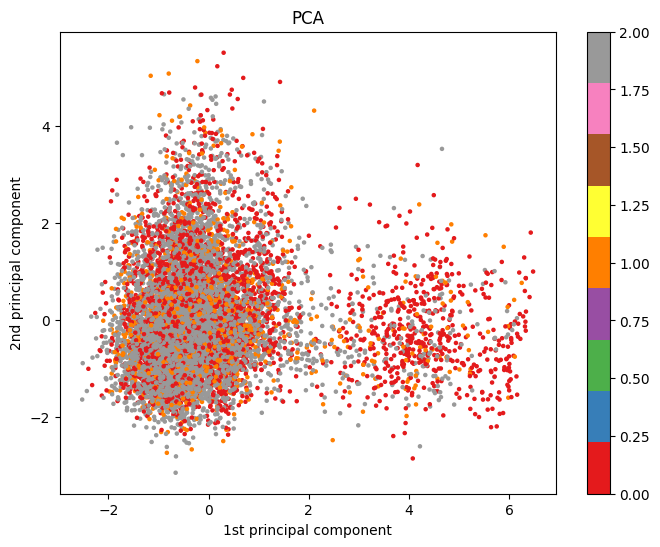

In [11]:
import pandas as pd
from sklearn.decomposition import PCA


df = pd.read_csv("../preprocessed.csv", na_filter=True, keep_default_na=False, na_values=[''])

features = df.iloc[:, :-1] 
n_components=2
pca = PCA(n_components=n_components)
features_pca = pca.fit_transform(features)

print(pca.explained_variance_ratio_)
# plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=df.iloc[:, -1], cmap=plt.cm.Set1, s=5)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title("PCA")
# color and label
plt.colorbar()
plt.show()

In [12]:
# Kmeans clustering, show inertia, silhouette score, purity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import accuracy_score

df = pd.read_csv("../preprocessed.csv", na_filter=True, keep_default_na=False, na_values=[''])
x = df.iloc[:, :-1]

# Kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x)


c:\Users\Jaezic\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [13]:
import numpy as np
from sklearn import metrics


def purity_score(y_true, y_pred):
    # compute contingency matrix (i.e., confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true,
    y_pred)
    print(contingency_matrix)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [14]:
# show inertia, silhouette score, purity
print("inertia: ", kmeans.inertia_)
print("silhouette score: ", silhouette_score(x, kmeans.labels_, metric='euclidean'))
print("purity: ", purity_score(df.iloc[:, -1], kmeans.labels_))

inertia:  86810.53103417842
silhouette score:  0.12574941613062252
[[ 983 1887  518]
 [ 521  771  101]
 [2121 3033  215]]
purity:  0.5588177339901478
